In [ ]:
# start_time = "2024-03-24T10:11:13.00Z"
# end_time = "2024-03-24T11:10:13.00Z"

## Import necessary libraries 

In [147]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, timezone

## Functions

In [174]:
def fetch_prometheus_data(prometheus_url: str, query: str, start_time: str, end_time: str, step: str) -> list:
    try:
        params = {"query": query, "start": start_time, "end": end_time, "step": step}
        response = requests.get(prometheus_url + "/api/v1/query_range", params=params)
        if response.status_code == 200:
            resp = response.json()
            return resp.get("data").get("result")[0].get("values")
        else:
            print(
                f"Failed to fetch data from Prometheus. Status code: {response.status_code}"
            )
            return None
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch data from Prometheus: {e}")
        return None

In [173]:
def convert_to_dataframe(data: list) -> pd.DataFrame:
    # Convert to DataFrame
    df = pd.DataFrame(data, columns=['timespmp', 'value'])
    # Convert 'timespmp' column to datetime
    df['timespmp'] = pd.to_datetime(df['timespmp'], unit='s')
    # Convert 'value' column to float
    df['value'] = df['value'].astype(float)
    # Set 'timespmp' column as index
    df.set_index('timespmp', inplace=True)
    return df

In [144]:
def get_closest_three_minutes_ago_value(df: pd.DataFrame, period: int) -> float:
    # Get current timestamp
    current_time = datetime.now()
    # Subtract 3 minutes
    three_minutes_ago = current_time - timedelta(minutes=period)
    # Convert to pandas Timestamp object
    three_minutes_ago_pandas = pd.Timestamp(three_minutes_ago)
    # Query the closest datetime index value
    iloc_idx = df.index.get_indexer([three_minutes_ago_pandas], method='nearest')[0]
    value = df.iloc[iloc_idx]['value']
    return value 

In [181]:
def simulate_prediction(prometheus_url: str, query: str, period: int, step: str) -> int:
    # Fetching the fort minutes ago data from prometheus 
    current_time = datetime.now(timezone.utc)
    fort_minutes_ago = current_time - timedelta(minutes=period+1)
    current_time_formatted = current_time.strftime('%Y-%m-%dT%H:%M:%S.00Z')
    fort_minutes_ago_formatted = fort_minutes_ago.strftime('%Y-%m-%dT%H:%M:%S.00Z')
    data = fetch_prometheus_data(prometheus_url=prometheus_url, query=query, start_time=fort_minutes_ago_formatted, end_time=current_time_formatted, step=step)
    # convert to dataframe 
    df = convert_to_dataframe(data)
    print(df.size)
    # simulate prediction 
    value = get_closest_three_minutes_ago_value(df=df, period=period)
    return int(value)


## Testing

In [205]:
prometheus_url = "http://localhost:9090"
query = "sum(rate(python_request_operations_total[1m]))"
period = 3
step = "15s"
simulate_prediction(prometheus_url=prometheus_url, query=query, period=period, step=step)

17


7.8606401758651705

In [ ]:
prometheus_url = "http://localhost:9090"
query = "rate(python_request_operations_total[1m])"
step = "15s"
start_time = "2024-03-24T10:11:13.00Z"
end_time = "2024-03-24T11:10:13.00Z"
fetch_prometheus_data(prometheus_url=prometheus_url, query=query, start_time=start_time, end_time=end_time, step=step)

In [113]:
df['y']

ds
2024-03-24 10:11:13     7.066902
2024-03-24 10:11:28    13.066231
2024-03-24 10:11:43    13.066231
2024-03-24 10:11:58    19.367312
2024-03-24 10:12:13    19.367312
                         ...    
2024-03-24 11:09:13    19.299357
2024-03-24 11:09:28    25.666667
2024-03-24 11:09:43    25.666667
2024-03-24 11:09:58    25.666667
2024-03-24 11:10:13    25.666667
Name: y, Length: 237, dtype: float64

## ML model prediction simulation

### Fetching the data from prometheus

In [52]:
prometheus_url = "http://localhost:9090"
query = "rate(python_request_operations_total[1m])"
start_time = "2024-03-24T10:11:13.00Z"
end_time = "2024-03-24T11:10:13.00Z"
step = "15s"
data = fetch_prometheus_data(prometheus_url, query, start_time, end_time, step)
data

### Converting the data into a dataframe

In [ ]:
# Convert to DataFrame
df = pd.DataFrame(data, columns=['timespmp', 'value'])
# Convert 'timespmp' column to datetime
df['timespmp'] = pd.to_datetime(df['timespmp'], unit='s')
# Convert 'value' column to float
df['value'] = df['value'].astype(float)
# Set 'timespmp' column as index
df.set_index('timespmp', inplace=True)
df.head()

### Visualizing the data 

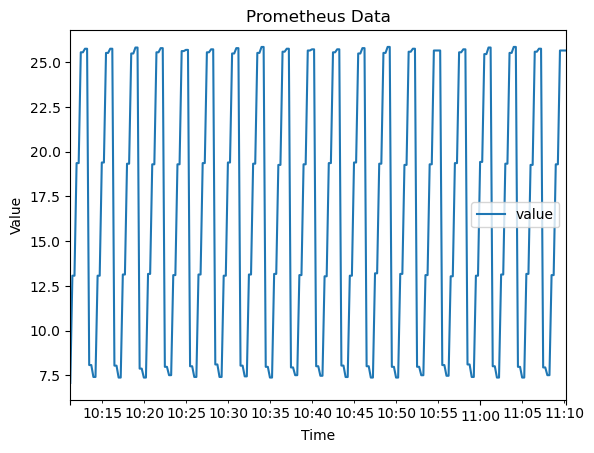

In [55]:
df.plot()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Prometheus Data')
plt.show()

In [11]:
df = pd.read_csv('data.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)

### Simuation

In [91]:
simulate_prediction(df=df)

25.666666666666668